In [1]:
#-----------------------------------------------------------------------
# Librerías y algunas variables
#-----------------------------------------------------------------------
import mne                                                              # pip install mne
mne.set_log_level('WARNING')                                            # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    # Por ahora lo voy a usar para cambiar los nombres de las columnas

import a_funciones as a_fun  

color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'

#-----------------------------------------------------------------------
# DrugSignal
#-----------------------------------------------------------------------
# Randomize amplitude and jitter.
# Find the right locations where this should be inserted in the stream.
# Insert the signal mantaining the continiuity of the EEG.
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
    return signal

#-----------------------------------------------------------------------
# Distintas modificaciones de DrugSignal para analizar el comportamiento
#-----------------------------------------------------------------------
def DrugSignal_ERPx1000(DS_ERPx1000, t_flash):                               # erptemplate1*1000
    for i in range(0,500):
        if (t_flash[i,3]==2):        
            DS_ERPx1000[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*1000)
    return DS_ERPx1000

def DrugSignal_sinERP(signal, t_flash):                                 # sin ERP.
    for i in range(0,500):
        if (t_flash[i,3]==2):
            DS_sinERP = signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:]
    return DS_sinERP

In [2]:
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat')
routput = mat['routput']

erptemplate1 = routput[0][7][0][1][0][0][0][7]                          # In this ERPTemplate, there are two different template signals that are good.
erptemplate2 = routput[0][7][0][1][0][0][0][0] 

erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)              # The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

p300subject25 = scipy.io.loadmat('./dataset/p300-subject-25.mat')       # Now load the basal EEG stream

signal = p300subject25['data'][0][0][0]    
df_signal = a_fun.to_df(signal)

t_flash = p300subject25['data'][0][0][4]                                # Flash matrix
df_t_flash = a_fun.to_df(t_flash)

#-----------------------------------------------------------------------
# Distintas modificaciones de DrugSignal para analizar el comportamiento
#-----------------------------------------------------------------------

#DS_ERPx1000 = signal
#DrugSignal_ERPx1000 = DrugSignal_ERPx1000(DS_ERPx1000, t_flash)
#df_DrugSignal_ERPx1000 = a_fun.to_df(DrugSignal_ERPx1000)

#DS_sinERP = signal
#DrugSignal_sinERP = DrugSignal_sinERP(DS_sinERP, t_flash)
#df_DrugSignal_sinERP = a_fun.to_df(DrugSignal_sinERP)


REVISAR LA ULTIMA FUNCION ARRIBA

A continuación, grafico las tres señales: signal, flash y drugsignal.  
En la siguiente gráfica modifico el erptemplate1 multiplicándolo por 1000 dentro de la función DrugSignal_ALEX.  
El objetivo es visualizar en dónde afecta la señal.    
Se detecta que el rango afectado es entre 0 y 50ms.  
Para la gráfica de DrigSignal veo en un rango pequeño: plt.xlim([7500,15500]), plt.ylim([-5500,6800]).  
En ése mismo rango, signal es de muy baja amplitud.  

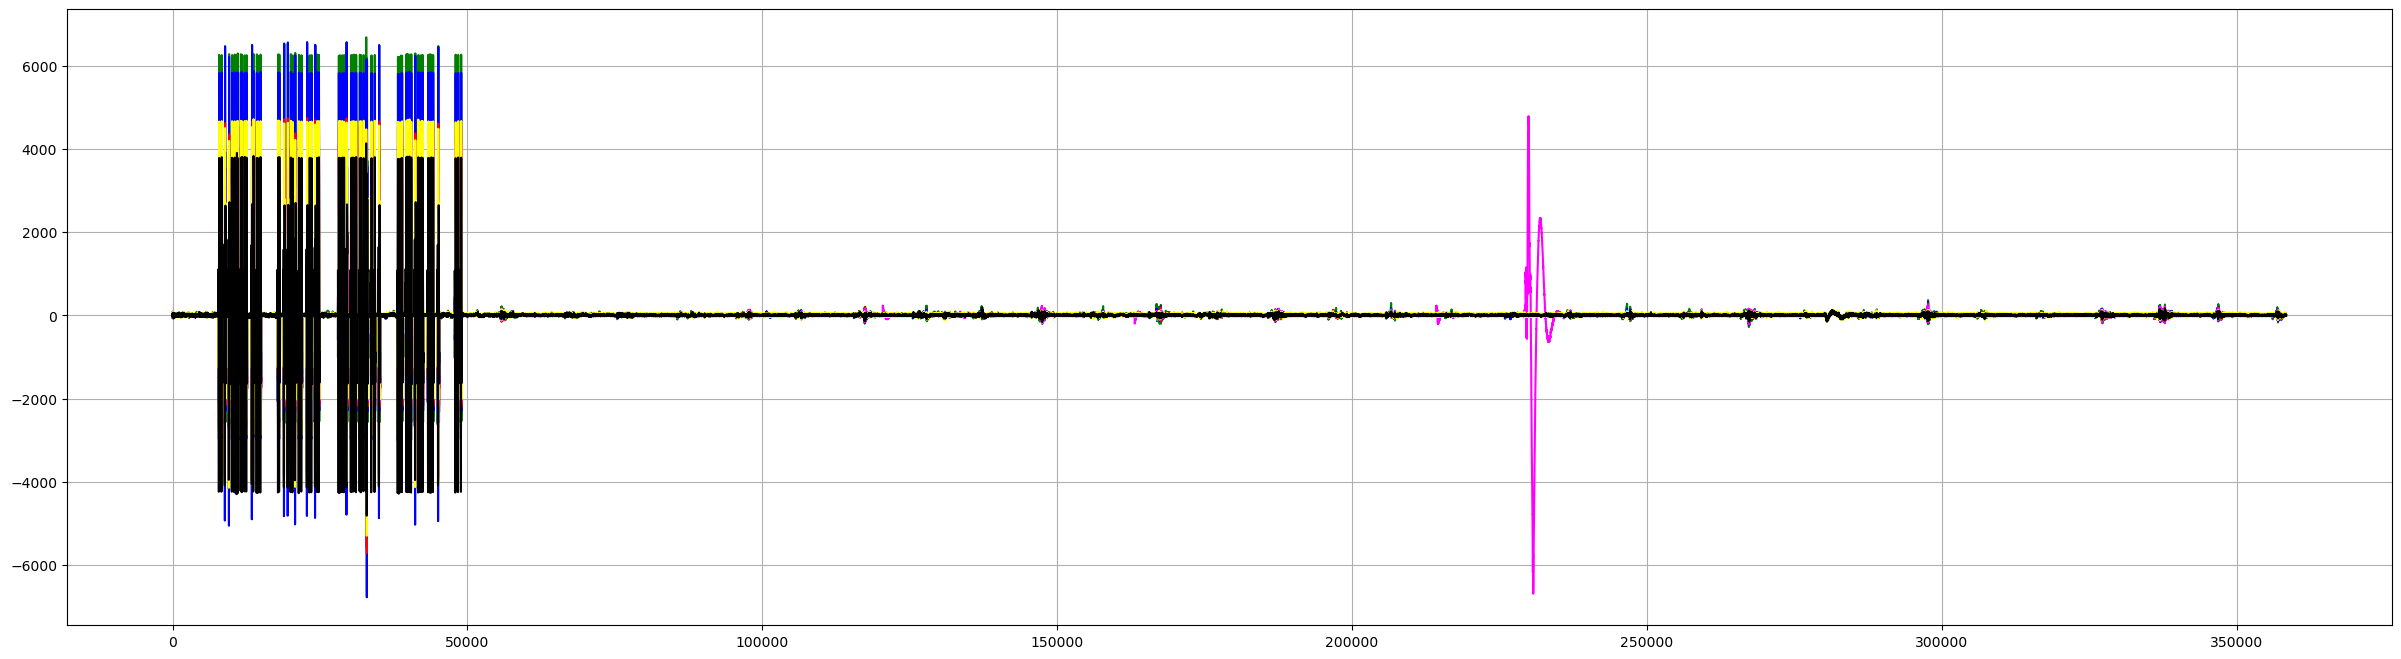

(None, None)

In [3]:
plt.figure(figsize=(30,8))                                      # Signal
for i in range(0,7):
    plt.plot(df_signal['sample'], df_signal[i], color[i])
#plt.xlim([7500,15500]), plt.ylim([-75,75])
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))                                      # Flash
plt.plot(df_t_flash['sample'], df_t_flash[0])
plt.xlim([0,500])
plt.ylim([0,50000]);
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
for i in range(0,7):
    plt.plot(df_DrugSignal_ERPx1000['sample'], df_DrugSignal_ERPx1000[i], color[i])
plt.xlim([7500,15500]), plt.ylim([-5500,6800]), plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))                                      # DrugSignal
for i in range(0,7):
    plt.plot(df_DrugSignal_sinERP['sample'], df_DrugSignal_sinERP[i], color[i])
#plt.xlim([7500,15500]), plt.ylim([-5500,6800]) 
plt.grid(), plt.show()

=============================================================================================
=============================================================================================
=============================================================================================
=============================================================================================
=============================================================================================

### *data.flash: Sample point where each flashing starts (sample point id, duration, stimulation, hit/nohit)* 
data.flash: punto de muestra donde comienza cada parpadeo (identificación del punto de muestra, duración, estimulación, hit/nohit)  
Nota: En la función DrugSignal sólo usa el canal 0 y el 3. Por ahora los otros canales no me interesan.

https://www.kaggle.com/datasets/rramele/p300samplingdataset

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_t_flash['sample'], df_t_flash[3])
plt.xlim([0,500])
plt.ylim([0.9,2.1]);
plt.grid(), plt.show()

In [ ]:
signal_ALEX2 = to_df(signal)
signal_ALEX2.head(10)

In [ ]:
plt.figure(figsize=(30,8))
for i in range(0,6):
    plt.plot(df_signal_original['sample'], df_signal_original[i], color[i])
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_DrugSignal_ALEX['sample'], df_DrugSignal_ALEX[0], color[2])
plt.xlim([0,70000])
plt.ylim([-200,250]);
plt.grid(), plt.show()

In [ ]:
plt.figure(figsize=(30,8))
plt.plot(df_signal_original['sample'], df_signal_original[0], color[1])
plt.xlim([0,70000])
plt.ylim([-200,250]);
plt.grid(), plt.show()